In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import plotly.figure_factory as ff
plotly.tools.set_credentials_file(username='yaghdev1', api_key='rbfLbdNQUHWurCin6fgQ')

In [13]:
year = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

excel_1 = pd.read_excel('C:/Users/Krishan/Downloads/FT50_WOS/insitutional_year_wise_all/Insitutional_2005.xlsx')
excel_1 = excel_1.loc[excel_1['Insitute'].apply(lambda x: x[-4:] == 'USA.')].iloc[:,[0, 4]]
 
for i in range(0, len(year)):    
    excel_2 = pd.read_excel('C:/Users/Krishan/Downloads/FT50_WOS/insitutional_year_wise_all/Insitutional_'+str(year[i])+'.xlsx')
    excel_2 = excel_2.loc[excel_2['Insitute'].apply(lambda x: x[-4:] == 'USA.')]
    excel_1 = pd.merge(excel_1, excel_2.iloc[:,[0, 4]], on='Insitute', how='outer', suffixes=('2005' if i ==0 else year[i-1], year[i]))
      
excel_1 = excel_1.sort_values(by='page rank2005', ascending=False) 

In [14]:
pearson_corr = excel_1.corr(method='pearson', min_periods=1)
list_2 = ['page rank2005', 'page rank2006', 'page rank2007', 'page rank2008', 'page rank2009', 'page rank2010', 'page rank2011', 'page rank2012', 'page rank2013', 'page rank2014', 'page rank2015', 'page rank2016', 'page rank']
res = []
year = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
year_1 = [i for i in year for x in range(0,len(year)-1)]

count = 0
for i in list_2:
    pearson_ins = pearson_corr.loc[i].values
    pearson_ins = np.delete(pearson_ins, count)
    res = np.concatenate((res, pearson_ins))
    count += 1     

In [15]:
year = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
 
excel_1 = pd.read_excel('C:/Users/Krishan/Downloads/FT50_WOS/insitutional_year_wise_all/Insitutional_2005.xlsx')
excel_1 = excel_1.loc[excel_1['Insitute'].apply(lambda x: x[-4:] != 'USA.')].iloc[:,[0, 4]]
 
for i in range(0, len(year)):    
    excel_2 = pd.read_excel('C:/Users/Krishan/Downloads/FT50_WOS/insitutional_year_wise_all/Insitutional_'+str(year[i])+'.xlsx')
    excel_2 = excel_2.loc[excel_2['Insitute'].apply(lambda x: x[-4:] != 'USA.')]
    excel_1 = pd.merge(excel_1, excel_2.iloc[:,[0, 4]], on='Insitute', how='outer', suffixes=('2005' if i ==0 else year[i-1], year[i]))
      
excel_1 = excel_1.sort_values(by='page rank2005', ascending=False) 

In [16]:
pearson_corr = excel_1.corr(method='pearson', min_periods=1)
list_2 = ['page rank2005', 'page rank2006', 'page rank2007', 'page rank2008', 'page rank2009', 'page rank2010', 'page rank2011', 'page rank2012', 'page rank2013', 'page rank2014', 'page rank2015', 'page rank2016', 'page rank']
res_2 = []
year = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
year_2 = [i for i in year for x in range(0,len(year)-1)]

count = 0
for i in list_2:
    pearson_ins = pearson_corr.loc[i].values
    pearson_ins = np.delete(pearson_ins, count)
    res_2 = np.concatenate((res_2, pearson_ins))
    count += 1 

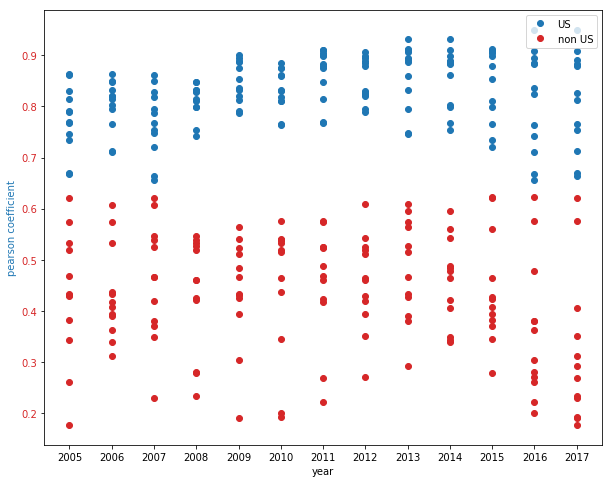

In [21]:
 
data1 = res
data2 = year_1
fig, ax1 = plt.subplots(figsize=(10, 8))

color = 'tab:blue'
ax1.set_xlabel('year')
ax1.set_ylabel('pearson coefficient', color=color)
ax1.plot(year_1, data1, 'ro', color=color)
ax1.tick_params(axis='y', labelcolor=color) 
 
color = 'tab:red' 
ax1.plot(year_2, res_2, 'ro', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['US', 'non US'], loc='upper right')
plt.show()